In [49]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [50]:
X, y = sklearn.datasets.make_moons(200, noise=0.2)

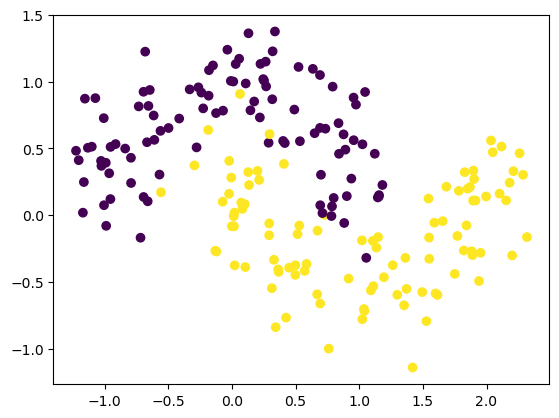

In [51]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [52]:
input_neurons = 2
output_neurons = 2
samples = X.shape[0]
learning_rate = 0.001
lambda_reg = 0.01

In [53]:
def retreive(model_dict):
    W1 = model_dict["W1"]
    b1 = model_dict["b1"]
    W2 = model_dict["W2"]
    b2 = model_dict["b2"]
    return W1, b1, W2, b2

In [54]:
def forward(x, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)

    # Layer 1
    z1 = X.dot(W1) + b1 # Apply weights and bias to inputs
    a1 = np.tanh(z1) # Activation Function

    # Layer 2
    z2 = a1.dot(W2) + b2 # Apply weights and bias to inputs
    a2 = np.tanh(z2) # Activation Function

    # Softmax
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    return z1, a1, softmax

In [55]:

def predict(x, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)

    # Layer 1
    z1 = X.dot(W1) + b1 # Apply weights and bias to inputs
    a1 = np.tanh(z1) # Activation Function

    # Layer 2
    z2 = a1.dot(W2) + b2 # Apply weights and bias to inputs
    a2 = np.tanh(z2) # Activation Function

    # Softmax
    exp_scores = np.exp(a2)
    softmax = exp_scores / np.sum(exp_scores, dim=1, keepdims=True) # (200, 2)

    return np.argmax(softmax, axis=1)

In [56]:
def loss(softmax, y, model_dict):
    W1, b1, W2, b2 = retreive(model_dict)

    m = np.zeros(200)

    # Cross Entropy
    for i, correct_index in enumerate(y):
        m[i] = softmax[i][correct_index]

    log_prob = -np.log(m)

    softmax_loss = np.sum(log_prob)
    reg_loss = (lambda_reg / 2) * (np.sum(np.square(W1)) + np.sum(np.square(W2))) # L2 Loss
    loss = softmax_loss + reg_loss

    return float(loss / y.shape[0]) # normalize loss

In [57]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retreive(model_dict)
        z1, a1, softmax = forward(x, model_dict)
        
        # I really don't understand the math behind this
        delta3 = np.copy(softmax)
        delta3[range(x.shape[0]), y] -= 1 # (200, 2), delta3 = softmax - 1

        dW2 = (a1.T).dot(delta3) # a1: (3, 200) dot (200, 2) => (3, 2)
        db2 = np.sum(delta3, axis=0, keepdims=True) # (1, 2)
        delta2 = delta3.dot(W2.T) * (1-np.power(np.tanh(z1), 2))

        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2)
        dW1 += lambda_reg * np.sum(W1)

        # Update Weights
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2

        # Update the model dictionary
        model_dict = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

        # Print loss every 50 epochs
        if i % 50 == 0:
            print(f"Loss at epoch {i} is: {loss(softmax, y, model_dict)}")

    return model_dict

In [58]:
def init_network(input_dim, hidden_dim, output_dim):
    model = {}

    # Xavier Initialization
    W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim)/ np.sqrt(hidden_dim)
    b2 = np.zeros((1, output_dim))

    model["W1"] = W1 
    model["b1"] = b1 
    model["W2"] = W2 
    model["b2"] = b2 

    return model

In [62]:
model_dict = init_network(input_dim = input_neurons , hidden_dim = 3, output_dim = output_neurons)
model = backpropagation(X, y, model_dict, 1000)

Loss at epoch 0 is: 0.572605597989941
Loss at epoch 50 is: 0.41125798921235224
Loss at epoch 100 is: 0.37665801966724083
Loss at epoch 150 is: 0.3723106195325734
Loss at epoch 200 is: 0.37770603919633877
Loss at epoch 250 is: 0.38339094563683795
Loss at epoch 300 is: 0.38745590121900547
Loss at epoch 350 is: 0.39017044139155405
Loss at epoch 400 is: 0.39178100674461697
Loss at epoch 450 is: 0.3919422541252559
Loss at epoch 500 is: 0.3904908297788753
Loss at epoch 550 is: 0.3880929841969485
Loss at epoch 600 is: 0.38515625260596814
Loss at epoch 650 is: 0.3818484708533979
Loss at epoch 700 is: 0.3787694110875844
Loss at epoch 750 is: 0.37656126221340636
Loss at epoch 800 is: 0.37547496875897934
Loss at epoch 850 is: 0.37541177375057794
Loss at epoch 900 is: 0.37612625210320727
Loss at epoch 950 is: 0.3773726766877412
